# Stroke Prediction with Ensemble
 - Random Forest Classifier : Accuracy - 0.90 
 - Gradient Boosting Classifier : Accuracy - 0.89

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**

- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



---
### Contents(index)
```
Step 1. Data Load & EDA
Step 2. Feature Engineering
     2-a. Binary Features
     2-b. Continuous Features
     2-c. Categorical Features
Step 3. Train / Test set Split & Upsampling
Step 4. Modeling & Prediction
```

### Step 1. Data Load & EDA

In [2]:
import pandas as pd

In [3]:
ls

Untitled.ipynb  data/


In [4]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
df.bmi

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [13]:
df.avg_glucose_level

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

---
- ID : delete
- Age : transform to Category ( 20s, 30s, 40s ...)
- Gender : transfrom by One-hot Encoding
- work_type : transfrom by One-hot Encoding
- smoking_status : transfrom by One-hot Encoding
- bmi : transform to Category ( 20-29, 30-39 ...)
- avg_glucose_level : transform to Category ( 0-50, 51-100 ...)
- Others : binary

---
It's sparse table, so we use RandomForest and GradientBoosting Algorithm instead of KNN

In [14]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Step 2. Feature Engineering

In [15]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
df[df['gender'] == 'Other'].index

Int64Index([3116], dtype='int64')

In [20]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [21]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 2-a. Feature Engineering - Binary Features

1. gender : 0 or 1

In [23]:
df['gender'] = df['gender'].apply(lambda x : 0 if x == 'Female' else 1)

2. ever_married : 0 or 1

In [25]:
df['ever_married'].apply(lambda x : 0 if x == 'No' else 1).unique()

array([1, 0])

In [27]:
df['ever_married'] = df['ever_married'].apply(lambda x : 0 if x == 'No' else 1)

3. Residence_type

In [29]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [31]:
df['Residence_type'] = df['Residence_type'].apply(lambda x : 0 if x == 'Rural' else 1)

In [32]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


### 2-b. Feature Engineering - Continuous Features

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
import warnings
warnings.filterwarnings("ignore")

1. age

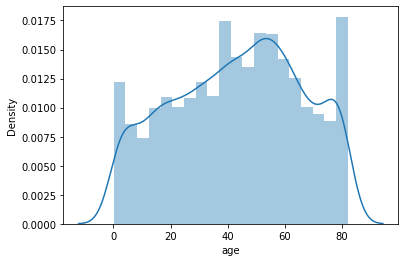

In [39]:
sns.distplot(df['age']);

In [43]:
def age_classifier(age):
    if age < 20 :
        return 'age_under 19'
    elif age < 40 :
        return 'age_20 to 39'
    elif age < 60:
        return 'age_40 to 59'
    else:
        return 'age_over 60'

In [44]:
df['age'].apply(lambda x : age_classifier(x))

0        age_over 60
1        age_over 60
2        age_over 60
3       age_40 to 59
4        age_over 60
            ...     
5105     age_over 60
5106     age_over 60
5107    age_20 to 39
5108    age_40 to 59
5109    age_40 to 59
Name: age, Length: 5109, dtype: object

In [45]:
df['age'] = df['age'].apply(lambda x : age_classifier(x))

In [46]:
df['age'].unique()

array(['age_over 60', 'age_40 to 59', 'age_20 to 39', 'age_under 19'],
      dtype=object)

In [47]:
df['age'].value_counts()

age_40 to 59    1564
age_over 60     1376
age_20 to 39    1203
age_under 19     966
Name: age, dtype: int64

2. avg_glucose_level

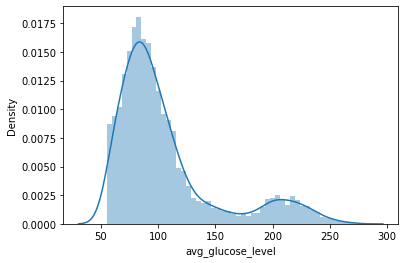

In [49]:
sns.distplot(df['avg_glucose_level']);

In [51]:
df['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

___
let's split by 25%, 50%, 75% line

In [52]:
def glucose_level_classifier(level):
    if level < 77:
        return 'gl_under 25%'
    elif level < 91:
        return 'gl_26% to 50%'
    elif level < 114:
        return 'gl_50% to 75%'
    else:
        return 'gl_over 75%'

In [53]:
df['avg_glucose_level'].apply(lambda x : glucose_level_classifier(x))

0         gl_over 75%
1         gl_over 75%
2       gl_50% to 75%
3         gl_over 75%
4         gl_over 75%
            ...      
5105    gl_26% to 50%
5106      gl_over 75%
5107    gl_26% to 50%
5108      gl_over 75%
5109    gl_26% to 50%
Name: avg_glucose_level, Length: 5109, dtype: object

In [57]:
# let's check 'is properly distributed?'
df['avg_glucose_level'].apply(lambda x : glucose_level_classifier(x)).value_counts()

gl_50% to 75%    1340
gl_over 75%      1281
gl_under 25%     1260
gl_26% to 50%    1228
Name: avg_glucose_level, dtype: int64

In [58]:
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x : glucose_level_classifier(x))

3. bmi

In [60]:
df['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

---
Let's classify 'bmi' the same as 'avg_glucose_level' (distribution %)

In [75]:
def bmi_classifier(figure):
    if figure < 23:
        return 'bmi_under 25%'
    elif figure < 28:
        return 'bmi_26% to 50%'
    elif figure < 33:
        return 'bmi_50% to 75%'
    else:
        return 'bmi_over 75%'

---
!! But 'bmi' has 101 null values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   object 
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   object 
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 518.9+ KB


In [66]:
df[df.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,0,age_over 60,0,0,1,Self-employed,0,gl_over 75%,NaN,never smoked,1
8,27419,0,age_40 to 59,0,0,1,Private,0,gl_under 25%,NaN,Unknown,1
13,8213,1,age_over 60,0,1,1,Private,1,gl_over 75%,NaN,Unknown,1
19,25226,1,age_40 to 59,0,1,0,Govt_job,1,gl_over 75%,NaN,Unknown,1
27,61843,1,age_40 to 59,0,0,1,Private,0,gl_over 75%,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,1,age_40 to 59,0,0,0,Private,0,gl_under 25%,NaN,formerly smoked,0
5048,28788,1,age_40 to 59,0,0,1,Private,1,gl_over 75%,NaN,smokes,0
5093,32235,0,age_40 to 59,1,0,1,Govt_job,0,gl_50% to 75%,NaN,smokes,0
5099,7293,1,age_40 to 59,0,0,1,Private,0,gl_26% to 50%,NaN,smokes,0


We will fill null values with mean of bmi, because 50% line is similar with mean.

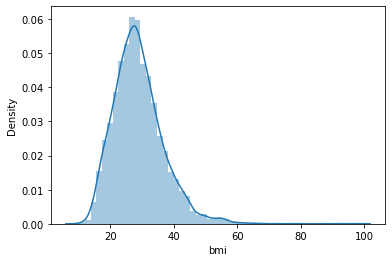

In [69]:
sns.distplot(df['bmi']);

In [70]:
df['bmi'].fillna(28, inplace=True)

In [72]:
df.bmi.isnull().sum()

0

Filled well

In [76]:
df['bmi'].apply(lambda x : bmi_classifier(x)).value_counts()

bmi_50% to 75%    1434
bmi_26% to 50%    1348
bmi_over 75%      1250
bmi_under 25%     1077
Name: bmi, dtype: int64

In [77]:
df['bmi'] = df['bmi'].apply(lambda x : bmi_classifier(x))

In [79]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,age_over 60,0,1,1,Private,1,gl_over 75%,bmi_over 75%,formerly smoked,1
1,51676,0,age_over 60,0,0,1,Self-employed,0,gl_over 75%,bmi_50% to 75%,never smoked,1
2,31112,1,age_over 60,0,1,1,Private,0,gl_50% to 75%,bmi_50% to 75%,never smoked,1
3,60182,0,age_40 to 59,0,0,1,Private,1,gl_over 75%,bmi_over 75%,smokes,1
4,1665,0,age_over 60,1,0,1,Self-employed,0,gl_over 75%,bmi_26% to 50%,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,age_over 60,1,0,1,Private,1,gl_26% to 50%,bmi_50% to 75%,never smoked,0
5106,44873,0,age_over 60,0,0,1,Self-employed,1,gl_over 75%,bmi_over 75%,never smoked,0
5107,19723,0,age_20 to 39,0,0,1,Self-employed,0,gl_26% to 50%,bmi_50% to 75%,never smoked,0
5108,37544,1,age_40 to 59,0,0,1,Private,0,gl_over 75%,bmi_26% to 50%,formerly smoked,0


### 2-c. Feature Engineering - Categorical Features

In This part, We try One-Hot Encoding to All Categorical Features including we tranformed before(age, avg_glucose_level, bmi)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5109 non-null   int64 
 1   gender             5109 non-null   int64 
 2   age                5109 non-null   object
 3   hypertension       5109 non-null   int64 
 4   heart_disease      5109 non-null   int64 
 5   ever_married       5109 non-null   int64 
 6   work_type          5109 non-null   object
 7   Residence_type     5109 non-null   int64 
 8   avg_glucose_level  5109 non-null   object
 9   bmi                5109 non-null   object
 10  smoking_status     5109 non-null   object
 11  stroke             5109 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 518.9+ KB


In [81]:
columns = df.columns

In [82]:
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
df[columns[0]].dtype

dtype('int64')

In [87]:
num_cols = []
cat_cols = []
for col in columns:
    if df[col].dtype == int:
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [88]:
print('numeric columns : {}'.format(num_cols))
print('categorical columns : {}'.format(cat_cols))

numeric columns : ['id', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']
categorical columns : ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


1. age

In [90]:
from sklearn.preprocessing import LabelBinarizer 

lb = LabelBinarizer()
X_encoded = lb.fit_transform(df['age']) 
X_encoded

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [91]:
df['age']

0        age_over 60
1        age_over 60
2        age_over 60
3       age_40 to 59
4        age_over 60
            ...     
5105     age_over 60
5106     age_over 60
5107    age_20 to 39
5108    age_40 to 59
5109    age_40 to 59
Name: age, Length: 5109, dtype: object

---
- colums : [age_20 to 39 ,age_40 to 59, age_over 60, age_under 19]

In [92]:
df['age'].unique()

array(['age_over 60', 'age_40 to 59', 'age_20 to 39', 'age_under 19'],
      dtype=object)

In [93]:
pd.DataFrame(X_encoded, columns=['age_20 to 39' ,'age_40 to 59', 'age_over 60', 'age_under 19'])

,age_20 to 39,age_40 to 59,age_over 60,age_under 19
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5104,0,0,1,0
5105,0,0,1,0
5106,1,0,0,0
5107,0,1,0,0


In [94]:
age_df = pd.DataFrame(X_encoded, columns=['age_20 to 39' ,'age_40 to 59', 'age_over 60', 'age_under 19'])

In [95]:
cat_cols

['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']

2. work_type

In [100]:
one_hot_encoded = lb.fit_transform(df['work_type'])

In [108]:
one_hot_encoded[-20:]

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [106]:
df['work_type'].tail(20)

5090         Govt_job
5091          Private
5092         Govt_job
5093         Govt_job
5094         children
5095         children
5096         Govt_job
5097    Self-employed
5098         children
5099          Private
5100    Self-employed
5101          Private
5102          Private
5103          Private
5104         children
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, dtype: object

In [103]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

---
mapping
- colums : ['Govt_job','Never_worked', 'Private', 'Self-employed', 'Children']

In [109]:
pd.DataFrame(one_hot_encoded, columns=['Govt_job','Never_worked', 'Private', 'Self-employed', 'Children'])

,Govt_job,Never_worked,Private,Self-employed,Children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5104,0,0,1,0,0
5105,0,0,0,1,0
5106,0,0,0,1,0
5107,0,0,1,0,0


In [110]:
work_type_df = pd.DataFrame(one_hot_encoded, columns=['Govt_job','Never_worked', 'Private', 'Self-employed', 'Children'])

3. avg_glucose_level 

In [111]:
df['avg_glucose_level']

0         gl_over 75%
1         gl_over 75%
2       gl_50% to 75%
3         gl_over 75%
4         gl_over 75%
            ...      
5105    gl_26% to 50%
5106      gl_over 75%
5107    gl_26% to 50%
5108      gl_over 75%
5109    gl_26% to 50%
Name: avg_glucose_level, Length: 5109, dtype: object

In [112]:
one_hot_encoded = lb.fit_transform(df['avg_glucose_level'])

In [113]:
one_hot_encoded

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [114]:
df['avg_glucose_level'].unique()

array(['gl_over 75%', 'gl_50% to 75%', 'gl_under 25%', 'gl_26% to 50%'],
      dtype=object)

mapping
- columns : ['gl_26% to 50%', 'gl_50% to 75%', 'gl_over 75%', 'gl_under 25%']

In [115]:
pd.DataFrame(one_hot_encoded, columns=['gl_26% to 50%', 'gl_50% to 75%', 'gl_over 75%', 'gl_under 25%'])

,gl_26% to 50%,gl_50% to 75%,gl_over 75%,gl_under 25%
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
5104,1,0,0,0
5105,0,0,1,0
5106,1,0,0,0
5107,0,0,1,0


In [116]:
agl_df = pd.DataFrame(one_hot_encoded, columns=['gl_26% to 50%', 'gl_50% to 75%', 'gl_over 75%', 'gl_under 25%'])

4. bmi

In [117]:
df['bmi']

0         bmi_over 75%
1       bmi_50% to 75%
2       bmi_50% to 75%
3         bmi_over 75%
4       bmi_26% to 50%
             ...      
5105    bmi_50% to 75%
5106      bmi_over 75%
5107    bmi_50% to 75%
5108    bmi_26% to 50%
5109    bmi_26% to 50%
Name: bmi, Length: 5109, dtype: object

In [118]:
one_hot_encoded = lb.fit_transform(df['bmi'])
one_hot_encoded

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [119]:
df['bmi'].unique()

array(['bmi_over 75%', 'bmi_50% to 75%', 'bmi_26% to 50%',
       'bmi_under 25%'], dtype=object)

---
mapping

- columns : ['bmi_26% to 50%', 'bmi_50% to 75%', 'bmi_over 75%', 'bmi_under 25%']

In [120]:
pd.DataFrame(one_hot_encoded, columns=['bmi_26% to 50%', 'bmi_50% to 75%', 'bmi_over 75%', 'bmi_under 25%'])

,bmi_26% to 50%,bmi_50% to 75%,bmi_over 75%,bmi_under 25%
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
5104,0,1,0,0
5105,0,0,1,0
5106,0,1,0,0
5107,1,0,0,0


In [121]:
bmi_df = pd.DataFrame(one_hot_encoded, columns=['bmi_26% to 50%', 'bmi_50% to 75%', 'bmi_over 75%', 'bmi_under 25%'])

In [122]:
df['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5109, dtype: object

In [123]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [124]:
lb.fit_transform(df['smoking_status'])

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [125]:
one_hot_encoded = lb.fit_transform(df['smoking_status'])

mapping
- columns : ['Unknown','formerly smoked','never smoked','smokes']

In [126]:
pd.DataFrame(one_hot_encoded, columns=['Unknown','formerly smoked','never smoked','smokes'])

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5104,0,0,1,0
5105,0,0,1,0
5106,0,0,1,0
5107,0,1,0,0


In [127]:
smoked_df = pd.DataFrame(one_hot_encoded, columns=['Unknown','formerly smoked','never smoked','smokes'])

In [129]:
cat_cols.append('age')

In [136]:
cat_cols

['work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age']

finally! merge!

In [131]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,age_over 60,0,1,1,Private,1,gl_over 75%,bmi_over 75%,formerly smoked,1
1,51676,0,age_over 60,0,0,1,Self-employed,0,gl_over 75%,bmi_50% to 75%,never smoked,1
2,31112,1,age_over 60,0,1,1,Private,0,gl_50% to 75%,bmi_50% to 75%,never smoked,1
3,60182,0,age_40 to 59,0,0,1,Private,1,gl_over 75%,bmi_over 75%,smokes,1
4,1665,0,age_over 60,1,0,1,Self-employed,0,gl_over 75%,bmi_26% to 50%,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,age_over 60,1,0,1,Private,1,gl_26% to 50%,bmi_50% to 75%,never smoked,0
5106,44873,0,age_over 60,0,0,1,Self-employed,1,gl_over 75%,bmi_over 75%,never smoked,0
5107,19723,0,age_20 to 39,0,0,1,Self-employed,0,gl_26% to 50%,bmi_50% to 75%,never smoked,0
5108,37544,1,age_40 to 59,0,0,1,Private,0,gl_over 75%,bmi_26% to 50%,formerly smoked,0


In [137]:
df.drop(cat_cols,axis=1,inplace=True)
df

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke
0,9046,1,0,1,1,1,1
1,51676,0,0,0,1,0,1
2,31112,1,0,1,1,0,1
3,60182,0,0,0,1,1,1
4,1665,0,1,0,1,0,1
...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,1,0
5106,44873,0,0,0,1,1,0
5107,19723,0,0,0,1,0,0
5108,37544,1,0,0,1,0,0


In [140]:
# delete meaningless column (for machie learning)
df.drop('id', axis=1, inplace=True)

In [141]:
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke
0,1,0,1,1,1,1
1,0,0,0,1,0,1
2,1,0,1,1,0,1
3,0,0,0,1,1,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
5105,0,1,0,1,1,0
5106,0,0,0,1,1,0
5107,0,0,0,1,0,0
5108,1,0,0,1,0,0


In [142]:
cat_cols

['work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age']

In [162]:
df.reset_index().iloc[:,1:]

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke
0,1,0,1,1,1,1
1,0,0,0,1,0,1
2,1,0,1,1,0,1
3,0,0,0,1,1,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
5104,0,1,0,1,1,0
5105,0,0,0,1,1,0
5106,0,0,0,1,0,0
5107,1,0,0,1,0,0


In [163]:
df = df.reset_index().iloc[:,1:]

In [165]:
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke
0,1,0,1,1,1,1
1,0,0,0,1,0,1
2,1,0,1,1,0,1
3,0,0,0,1,1,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
5104,0,1,0,1,1,0
5105,0,0,0,1,1,0
5106,0,0,0,1,0,0
5107,1,0,0,1,0,0


In [168]:
pd.concat([df,age_df,agl_df,work_type_df,bmi_df,smoked_df], axis=1)

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,age_20 to 39,age_40 to 59,age_over 60,age_under 19,...,Self-employed,Children,bmi_26% to 50%,bmi_50% to 75%,bmi_over 75%,bmi_under 25%,Unknown,formerly smoked,never smoked,smokes
0,1,0,1,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,1,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5105,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
5106,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5107,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [170]:
pd.concat([df,age_df,agl_df,work_type_df,bmi_df,smoked_df], axis=1).isnull().sum()

gender             0
hypertension       0
heart_disease      0
ever_married       0
Residence_type     0
stroke             0
age_20 to 39       0
age_40 to 59       0
age_over 60        0
age_under 19       0
gl_26% to 50%      0
gl_50% to 75%      0
gl_over 75%        0
gl_under 25%       0
Govt_job           0
Never_worked       0
Private            0
Self-employed      0
Children           0
bmi_26% to 50%     0
bmi_50% to 75%     0
bmi_over 75%       0
bmi_under 25%      0
Unknown            0
formerly smoked    0
never smoked       0
smokes             0
dtype: int64

In [171]:
final_df = pd.concat([df,age_df,agl_df,work_type_df,bmi_df,smoked_df], axis=1)

### Step 3. Train, Test set split & Upsampling

In [183]:
from sklearn.model_selection import train_test_split

In [187]:
X = final_df.drop('stroke', axis=1)
y = final_df['stroke']

In [188]:
X.shape, y.shape

((5109, 26), (5109,))

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [191]:
X_train.shape, y_train.shape

((4087, 26), (4087,))

In [192]:
X_test.shape, y_test.shape

((1022, 26), (1022,))

In [193]:
y_train.value_counts()

0    3893
1     194
Name: stroke, dtype: int64

In [194]:
y_test.value_counts()

0    967
1     55
Name: stroke, dtype: int64

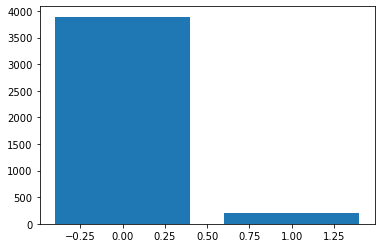

In [195]:
plt.bar(x = y_train.value_counts().index, height = y_train.value_counts().values);

It's imbalanced data, we have to upsample '1' in **training set-y**

In [196]:
from sklearn.utils import resample

In [197]:
train_df = pd.concat([X_train,y_train], axis=1)

In [198]:
train_df

,gender,hypertension,heart_disease,ever_married,Residence_type,age_20 to 39,age_40 to 59,age_over 60,age_under 19,gl_26% to 50%,...,Children,bmi_26% to 50%,bmi_50% to 75%,bmi_over 75%,bmi_under 25%,Unknown,formerly smoked,never smoked,smokes,stroke
1977,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3378,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
924,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4104,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3878,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4182,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4820,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2004,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [199]:
train_0 = train_df[train_df['stroke']==0]
train_1 = train_df[train_df['stroke']==1]


In [200]:
train_0.shape, train_1.shape

((3893, 27), (194, 27))

In [201]:
upsampled_train_1 = resample(train_1,
                             replace=True,
                             n_samples=3893,
                             random_state=123
                            )
upsampled_train_1.shape

(3893, 27)

In [202]:
upsampled_train = pd.concat([train_0, upsampled_train_1])

In [206]:
upsampled_train['stroke'].value_counts()

1    3893
0    3893
Name: stroke, dtype: int64

In [207]:
X_train = upsampled_train.drop('stroke',axis=1)
y_train = upsampled_train['stroke']

### Step 4. Modeling & Prediction

1. RandomForestClassifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
print('Train Accuracy : {:.2f}'.format(rfc.score(X_train, y_train)))
print('Test Accuracy : {:.2f}'.format(rfc.score(X_test, y_test)))

Train Accuracy : 0.97
Test Accuracy : 0.90


2. GradientBoostingClassifier

In [217]:
best_params = {}
score = 0
from sklearn.ensemble import GradientBoostingClassifier
for i in range(1,8):
    for j in [50, 100, 150, 200, 250, 300, 350, 400]:
        gbc = GradientBoostingClassifier(max_depth=i,
                                         n_estimators=j
                                        )
        gbc.fit(X_train, y_train)

        print('max_depth : {}'.format(i))
        print('n_estimators : {}'.format(j))
        print('Train Score : {}'.format(gbc.score(X_train,y_train)))
        print('Train Score : {}'.format(gbc.score(X_test,y_test)))
        print('----------------------------------------------------')
        if gbc.score(X_test,y_test) > score:
            score = gbc.score(X_test, y_test)
            best_params['max_depth'] = i
            best_params['n_estimators'] = j

max_depth : 1
n_estimators : 50
Train Score : 0.7499357821731313
Train Score : 0.7426614481409002
----------------------------------------------------
max_depth : 1
n_estimators : 100
Train Score : 0.7528898022090933
Train Score : 0.7172211350293543
----------------------------------------------------
max_depth : 1
n_estimators : 150
Train Score : 0.7549447726688929
Train Score : 0.7084148727984344
----------------------------------------------------
max_depth : 1
n_estimators : 200
Train Score : 0.7537888517852556
Train Score : 0.7074363992172211
----------------------------------------------------
max_depth : 1
n_estimators : 250
Train Score : 0.7549447726688929
Train Score : 0.7045009784735812
----------------------------------------------------
max_depth : 1
n_estimators : 300
Train Score : 0.7566144361674801
Train Score : 0.7035225048923679
----------------------------------------------------
max_depth : 1
n_estimators : 350
Train Score : 0.7563575648600052
Train Score : 0.7025440

In [218]:
best_params

{'max_depth': 7, 'n_estimators': 300}

In [219]:
score

0.8933463796477495